## Apply classification models on abalone dataset to find the gender
### https://archive.ics.uci.edu/ml/datasets/abalone 
### The objective is to analyze the abalone dataset and apply different models and understand which model is better in terms of performance.

### Import required packages

In [45]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [46]:
set_local_path = "C://NEERAJA//tmp//"

In [47]:
data = pd.read_csv(set_local_path + "abalone.csv")

In [48]:
data.head()
data.tail()
data.shape

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


(4177, 9)

##  Exploratory Data Analysis

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                4177 non-null object
Length             4177 non-null float64
Diameter           4177 non-null float64
Height             4177 non-null float64
Whole weight       4177 non-null float64
Shucked weight     4177 non-null float64
Viscera weight     4177 non-null float64
Shell weight       4177 non-null float64
Rings              4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### No Missing Values found in the dataset

In [50]:
data.describe()
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


([<matplotlib.patches.Wedge at 0x13823208>,
  <matplotlib.text.Text at 0x1383c710>])

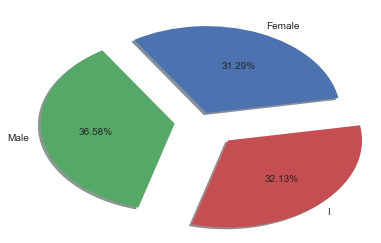

In [51]:
F = data.Sex.value_counts()['F']
M = data.Sex.value_counts()['M']
I = data.Sex.value_counts()['I']
labels = 'Female', 'Male', 'I'
sizes = [F, M, I]
explode = (0.1, 0.2, 0.3)

plt.pie(sizes, explode=explode,labels=labels, autopct='%1.2f%%', shadow=True, startangle=10)
plt.show()

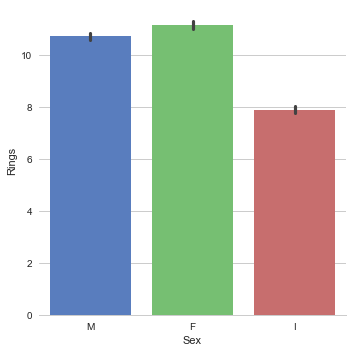

In [52]:
sns.set_style(style="whitegrid")

g = sns.factorplot(x="Sex", y="Rings", data=data, kind="bar", palette="muted", size=5)
g.despine(left=True)



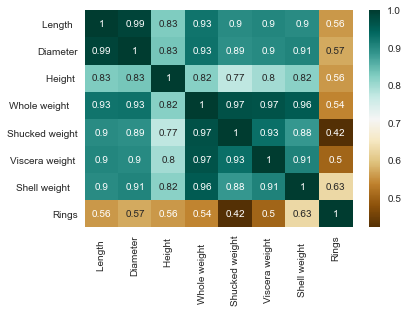

In [53]:
## draw heat map to know the correlation between the features
sns.heatmap(data.corr(), cmap='BrBG', annot=True)

### There is high correlation between the features Diameter & Length. All Weights are highly correlated to other weights

In [54]:
# Remove spaces in columns header
data.columns = [c.strip() for c in data.columns]
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

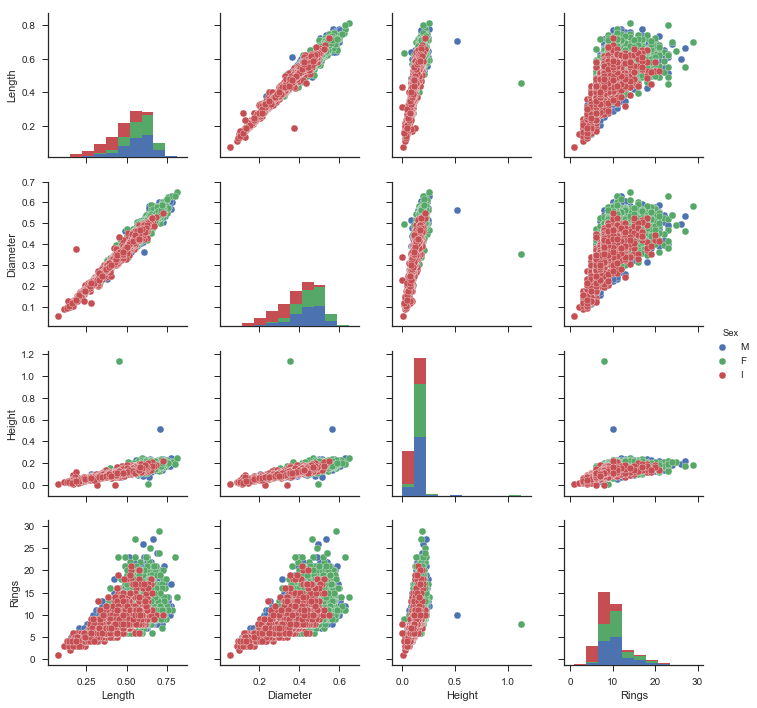

In [14]:
# pair plots between features, Length, Diameter, Height and Rings
sns.set_style(style="ticks")
sns.pairplot(data,
             x_vars = ['Length', 'Diameter', 'Height', 'Rings'],
             y_vars = ['Length', 'Diameter', 'Height', 'Rings'],
             hue = "Sex")

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

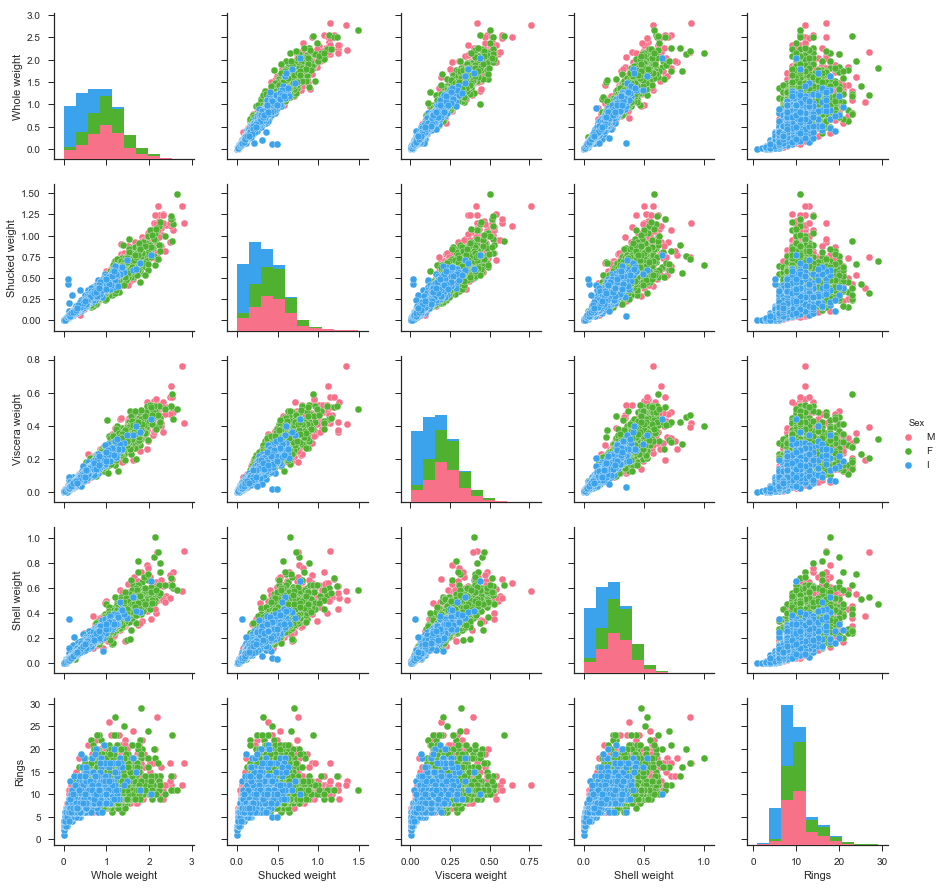

In [15]:
# pair plots between Whole weight, Shucked weight, Viscera weight, Shell weight and Rings
data.columns
sns.set_style(style="ticks")
sns.pairplot(data,
             x_vars = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
             y_vars = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
             hue = "Sex", palette = "husl")

## Standardization of  input variables

In [16]:
yvalue = data['Sex']
# pick few features based on above analysis
columns = ['Length', 'Height', 'Whole weight', 'Shucked weight', 'Rings']
xvalue = data[columns]
xvalue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 5 columns):
Length            4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(4), int64(1)
memory usage: 163.2 KB


In [18]:
# The feature 'Rings' is in whole numbers but other features are decimal values
# Apply standardization to bring features into same scale
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xvalue_t = ss.fit_transform(xvalue)
xvalue = xvalue_t
#standard_X = preprocessing.scale(xvalue)
#xvalue_std = standard_X



In [27]:
# train and test split, 80:20
xvalue.shape
yvalue.shape
x_train, x_test, y_train, y_test = train_test_split(xvalue, yvalue, test_size=0.2, random_state=123)
x_train.shape
x_test.shape
y_train.shape
y_test.shape


(4177, 5)

(4177,)

(3341, 5)

(836, 5)

(3341,)

(836,)

## Apply Logistic Regression

In [28]:
# Instanstiate and build logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logmodel = logreg.fit(x_train, y_train)


In [29]:
# prediction of model on test data
logpred = logreg.predict(x_test)
print(accuracy_score(y_test, logpred))
print(confusion_matrix(y_test, logpred))
print(classification_report(y_test, logpred))

0.558612440191
[[ 90  38 114]
 [ 18 232  30]
 [ 96  73 145]]
             precision    recall  f1-score   support

          F       0.44      0.37      0.40       242
          I       0.68      0.83      0.74       280
          M       0.50      0.46      0.48       314

avg / total       0.54      0.56      0.55       836



### The model accuracy is at approx 55%

## Apply SVC

In [30]:
# Build model and predict using SVC
from sklearn.svm import SVC
svcf = SVC(kernel='linear', decision_function_shape='ovr')
fitmodel = svcf.fit(x_train, y_train)
print(fitmodel)

# predict 
y_predict = svcf.predict(x_test)

# print scores
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.558612440191
[[ 48  39 155]
 [  5 232  43]
 [ 57  70 187]]
             precision    recall  f1-score   support

          F       0.44      0.20      0.27       242
          I       0.68      0.83      0.75       280
          M       0.49      0.60      0.54       314

avg / total       0.54      0.56      0.53       836



## Perform GridSearch

In [31]:
## define params
from sklearn.grid_search import GridSearchCV
params = {"kernel":('linear','rbf'), "C":[1,10,50,100], "gamma": [0.5,1], "decision_function_shape":('ovr','ovo')}
grid = GridSearchCV(svcf, params)
gridfit = grid.fit(x_train, y_train)

# get best params
gridfit.best_params_

{'C': 1, 'decision_function_shape': 'ovr', 'gamma': 0.5, 'kernel': 'rbf'}

In [32]:
# perform prediction
grid_pred = gridfit.predict(x_test)
# get scores
print(accuracy_score(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

0.576555023923
[[ 77  26 139]
 [ 14 224  42]
 [ 85  48 181]]
             precision    recall  f1-score   support

          F       0.44      0.32      0.37       242
          I       0.75      0.80      0.78       280
          M       0.50      0.58      0.54       314

avg / total       0.57      0.58      0.57       836



### Got accuracy of 57%

## Apply PCA on original 'data'

In [55]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [56]:
ynew = data['Sex']
xnew = data
xnew.drop('Sex', axis=1, inplace=True)


In [57]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1)
memory usage: 261.1 KB


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

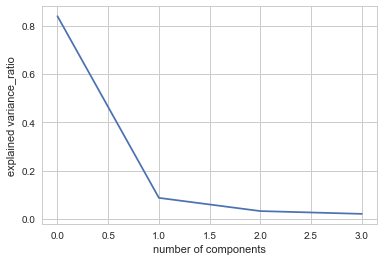

In [72]:
from sklearn.decomposition import PCA
# data Standardization
sstd = StandardScaler()
x_st = sstd.fit_transform(xnew)
xnew = x_st

#apply PCA
pca_model = PCA(n_components=4)
pca_model.fit(xnew)
#plot the explained variance
plt.plot(pca_model.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("explained variance_ratio")


### variance is explained by just 1 component. 

[[ 0.3721385   0.37309411  0.34002678  0.37830748  0.36245449  0.3685578
   0.37075782  0.24271277]
 [-0.0682827  -0.04004804  0.07046315 -0.13734619 -0.29883992 -0.17297852
   0.0454004   0.92120385]
 [ 0.03107032  0.04100507  0.89970562 -0.20619361 -0.2082863  -0.19737954
  -0.16157408 -0.19214359]
 [-0.60405352 -0.5875947   0.25677704  0.24184895  0.18324566  0.26522056
   0.24419207  0.04331013]]


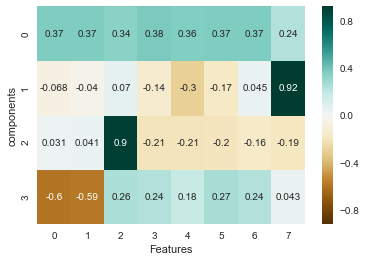

In [73]:
# visualize using heat map
print(pca_model.components_)
sns.heatmap(pca_model.components_, annot=True, cmap='BrBG')
plt.xlabel("Features")
plt.ylabel("components")

In [79]:
# Apply PCA with two components on train and test data 
# test and train split
x_train, x_test, y_train, y_test = train_test_split(xnew, ynew, test_size=0.1, random_state=123)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

# apply PCA
pca_x = PCA(n_components=2)
pca_train = pca_x.fit_transform(x_train)

# apply on test data
pca_test = pca_x.fit_transform(x_test)

(3759, 8)

(418, 8)

(3759,)

(418,)

## Apply Logistic Regression on top of PCA


In [81]:
# apply logistic regression and get accuracy scores
pca_log = LogisticRegression()
pca_logmodel = pca_log.fit(pca_train, y_train)

# predict values
pca_logy = pca_log.predict(pca_test)

# print scores
print(accuracy_score(y_test, pca_logy))
print(confusion_matrix(y_test, pca_logy))
print(classification_report(y_test, pca_logy))


0.564593301435
[[ 23  19  76]
 [  3 109  25]
 [ 26  33 104]]
             precision    recall  f1-score   support

          F       0.44      0.19      0.27       118
          I       0.68      0.80      0.73       137
          M       0.51      0.64      0.57       163

avg / total       0.54      0.56      0.54       418



## Apply SVC on top of PCA

In [82]:
# apply SVC
pca_svcf = SVC(kernel='linear', decision_function_shape='ovr')
pca_svcmodel = pca_svcf.fit(pca_train, y_train)

# predict the values
pca_svcy = pca_svcf.predict(pca_test)

# print scores
print(accuracy_score(y_test, pca_logy))
print(confusion_matrix(y_test, pca_logy))
print(classification_report(y_test, pca_logy))

0.564593301435
[[ 23  19  76]
 [  3 109  25]
 [ 26  33 104]]
             precision    recall  f1-score   support

          F       0.44      0.19      0.27       118
          I       0.68      0.80      0.73       137
          M       0.51      0.64      0.57       163

avg / total       0.54      0.56      0.54       418



## Conclusion: Logistic Regression gives good performance for this dataset.